First we import the libraries we're going to use

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

You will be looking at a diabetes dataset and trying to predict whether a patient with certain conditions will get diabetes in the future. Begin by loading the data in, using pandas so that the data is read in from the csv file into a dataframe.

In [15]:
df = pd.read_csv("titanicTrain.csv")

Print out the first 5 lines of the dataframe so we can see what's in the data

In [16]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Print out statistics on the numerical features

In [17]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Print out the correlation between the variables

In [18]:
print(df.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


Graph all the variables against each other and color the data points based on whether the patient has diabetes. Hint: Set diag_kws={'bw': 2} so that the function knows what to set as your bin size (the smaller the bin, the greater the resolution)

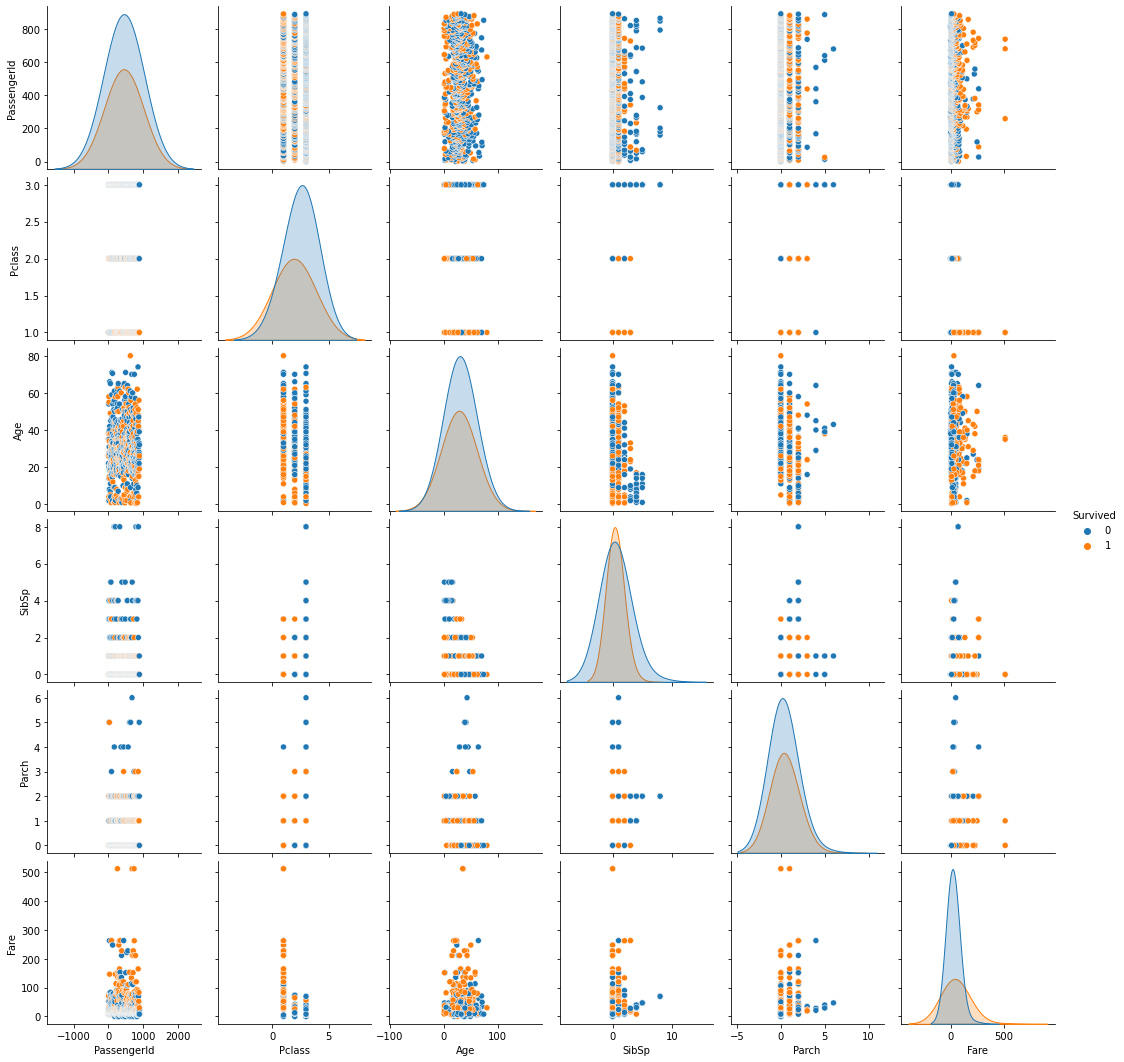

In [19]:
sb.pairplot(df, hue='Survived', diag_kws={'bw': 2})
plt.show()

In [20]:
# make clean version of dataframe taking out irrelevant cols
dfClean = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])
dfClean.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

See if there are any null values in the data and clean up data as you see fit

In [21]:
print(dfClean.isnull().any())
dfClean = dfClean.drop(columns=["Embarked"])

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool


Visualize the data as you see fit

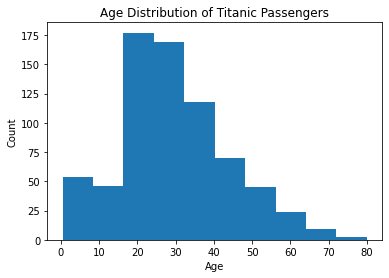

In [22]:
plt.figure(2)   # creates figure 2
plt.hist(dfClean['Age'])        # histogram of age variable
# label histogram
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [23]:
# take out all null values in age column
dfClean.loc[df['Age'].isnull(), ['Age']] = dfClean['Age'].median()
dfCleanFinal = pd.get_dummies(dfClean, columns=['Sex'])     # essentially one-hot encodes sex variable

Now we will be creating our decision tree. First, split the dataframe into features and target variable

In [24]:
y = dfCleanFinal.drop(columns=['Survived', 'Sex_male'], axis=1)

Split the data into 70% training and 30% test data, set random_state to 2021

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021, stratify=y)    # stratify splits data in stratified fashion 

NameError: name 'X' is not defined

Create the decision tree model with max_depth set to 4

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)

Fit the model to the diabetes training data

In [ ]:
dt.fit(X_train, y_train)

Predict diabetes outcome using our model and the test data

In [ ]:
y_pred = dt.predict(X_test)

Print the accuracy of our model

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

Plot the confusion matrix

In [ ]:
cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

Display the decision tree

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
titanicTree = tree.plot_tree(dt, feature_names=X.columns, class_names=str(y.unique()), filled=True, fontsize=6)

Print out the scores to find the most important features

In [ ]:
print(dt.feature_importances_)
print(X.columns)

Create a couple of sample patients and see if they are predicted to get diabetes

In [ ]:
passenger1 = np.array(['2', '20', '2', '1', '10.0' '1'])
print(dt.predict(passenger1.reshape(1, -1)))